In [1]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('Ecommerce Customers.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
data.drop(['Email','Address','Avatar'],axis=1,inplace=True)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


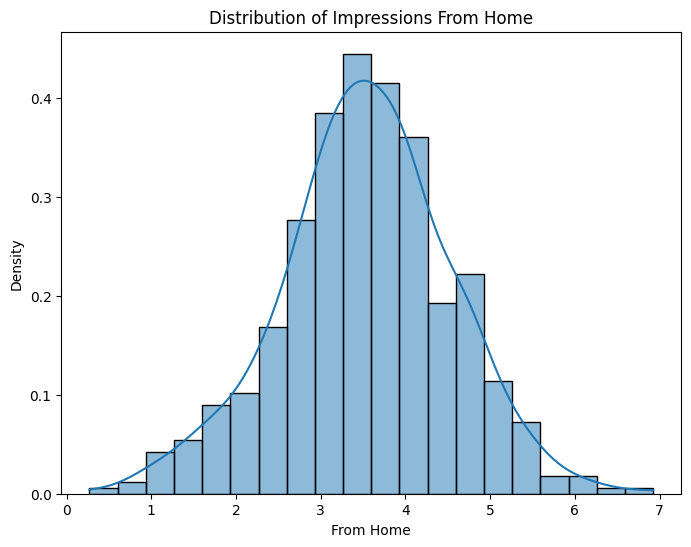

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt. figure(figsize=(8, 6))
sns.histplot(data['Length of Membership'], kde=True, bins=20, stat='density')
plt. title('Distribution of Impressions From Home')
plt.xlabel('From Home')
plt. ylabel('Density')
plt. show()


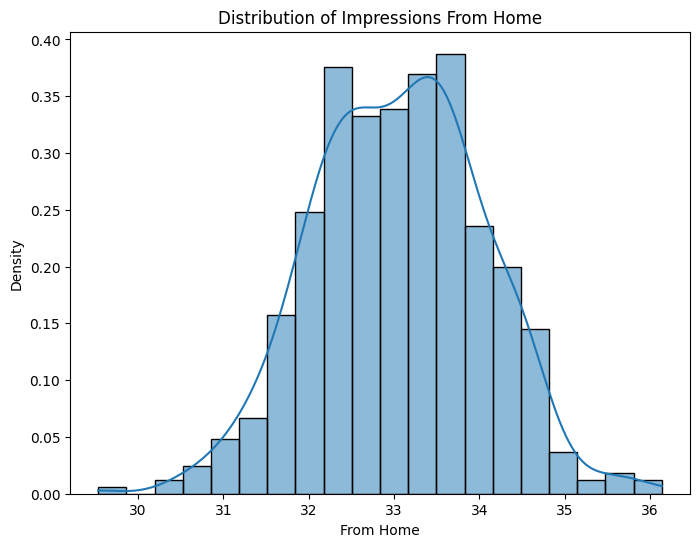

In [11]:
plt. figure(figsize=(8, 6))
sns.histplot(data['Avg. Session Length'], kde=True, bins=20, stat='density')
plt. title('Distribution of Impressions From Home')
plt.xlabel('From Home')
plt. ylabel('Density')
plt. show()

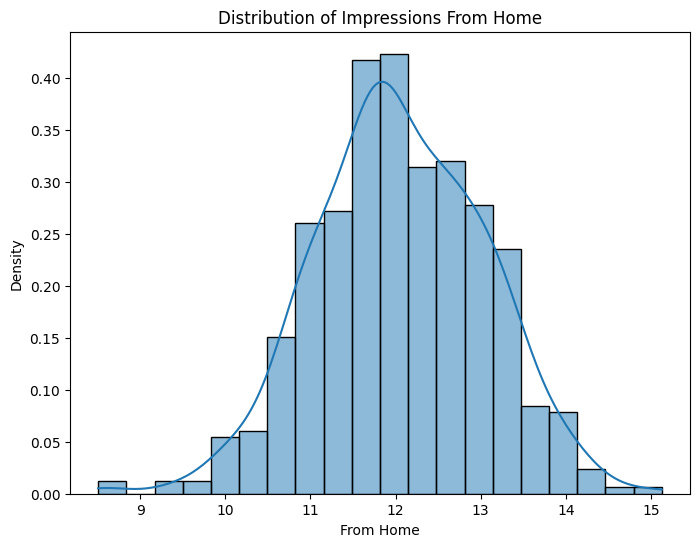

In [12]:
plt. figure(figsize=(8, 6))
sns.histplot(data['Time on App'], kde=True, bins=20, stat='density')
plt. title('Distribution of Impressions From Home')
plt.xlabel('From Home')
plt. ylabel('Density')
plt. show()

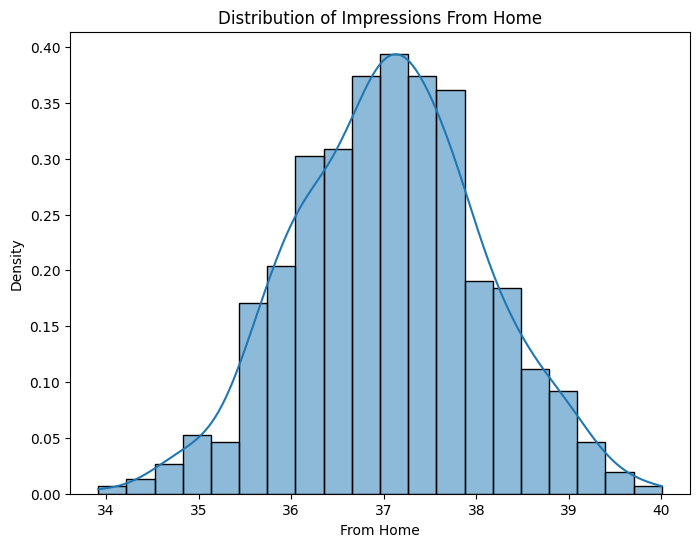

In [14]:
plt. figure(figsize=(8, 6))
sns.histplot(data['Time on Website'], kde=True, bins=20, stat='density')
plt. title('Distribution of Impressions From Home')
plt.xlabel('From Home')
plt. ylabel('Density')
plt. show()

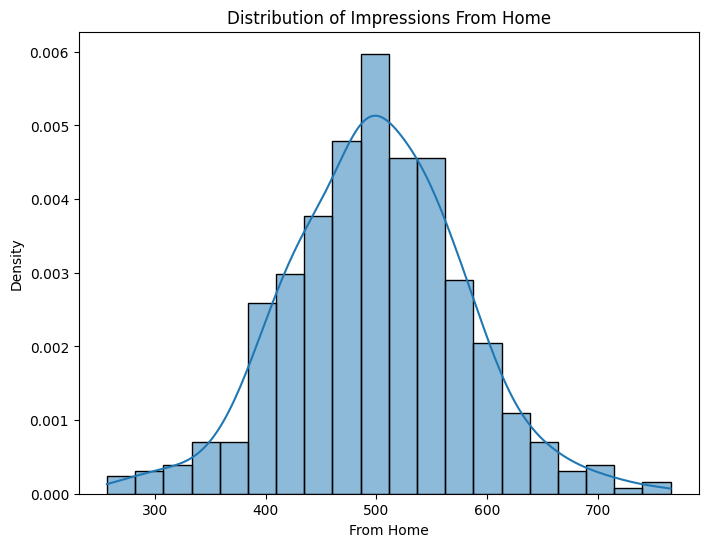

In [15]:
plt. figure(figsize=(8, 6))
sns.histplot(data['Yearly Amount Spent'], kde=True, bins=20, stat='density')
plt. title('Distribution of Impressions From Home')
plt.xlabel('From Home')
plt. ylabel('Density')
plt. show()

In [16]:
import plotly.express as px

fig = px.scatter(data, x='Time on Website', y='Yearly Amount Spent', title='Time on Website vs Yearly Amount Spent')
fig.show()


In [20]:
import plotly.express as px

fig = px.scatter(
    data_frame=data, 
    x='Time on App', 
    y='Yearly Amount Spent', 
    title='Time on App vs Yearly Amount Spent')
fig.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error

data['Total spend'] = data['Yearly Amount Spent'] * data['Length of Membership']
X = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
y = data['Total spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Intercept:', model.intercept_)
print('accuracy:', model.score(X_test, y_test))

Mean Squared Error: 9517.612766809558
Root Mean Squared Error: 97.55825319679293
Intercept: -1573.900111386355
Coefficients: [ 10.72173991   7.00587838 -13.91013868 504.89352165   3.40077418]
accuracy: 0.9795423968547731


In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('accuracy:', model.score(X_test, y_test))


Mean Squared Error: 2273.9646153576577
Root Mean Squared Error: 47.68610505543158
Mean Absolute Error: 31.91405296705035
accuracy: 0.9951122338335194
